## Can Data Science Tell If You are Single?

__Author:__ [Jocaz Ayrand G. Entico](https://www.linkedin.com/in/jocaz-entico-4675b9144/)

### Executive Summary
<p style="text-align: justify">In this notebook, we will predict the relationship status of an individual (in a relationship, single, and it's complicated) using the data collected from Asian Institute of Management Master of Science in Data Science Class of 2019. We will be implementing k-Nearest Neighbor (kNN) algorithm for machine learning algorithm to predict the relationship status of an individual based on the answers in the survey.</p>
<p style="text-align: justify">[kNN Classification](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a non-parametric and instance-based and one of the simplest machine learning algorithm. Before using kNN algorithm, we need to identify our target variable and the features that will be used in the model. Target is the variable that we are trying to predict and features are the predictors.</p>
<p style="text-align: justify">With the given dataset, the selected model is kNN Classification since the target is categorical. The efficiency of the kNN Classification is measured by the test accuracy. Hence, we are maximizing the test accuracy of the model by selecting different combination of features that will be used to determine the optimal number of neighbors for the algorithm. Therefore, the model that will be selected has the maximum precision in forecasting the current relationship status of an individual.</p>

### Let's Start!

Let's begin by providing all the libraries to be used in this notebook.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.linear_model import Lasso

### Data Description
<p style="text-align: justify">The dataset was collected during class hours under MSDS Class of 2019 at the Asian Institute of Management, in collaboration with 42 MSDS students and MSDS Faculty. This dataset is composed of answers from the 46-question survey conducted by the MSDS Faculty.The recordings were collected using Forms. </p>
__Attribute Information:__ <br>
cinema_movies - Number of movies you watched from cinema in the last two weeks<br>
home_movies - Number of movies you watched from home in the last two weeks<br>
coffee - Average Cups of coffee consumed per day<br>
mobile_bills - Average amount of bills paid for mobile used<br>
socmed - Average number of posts in social media per week<br>
age - How old are you?<br>
sex - Male or female?<br>
height - What is your height in cm?<br>
weight - What is your weight in kg?<br>
waist - What is your waist size in inches?<br>
fav_color - What is your favorite color?<br>
fav_number - What is your favorite number, from 0 to 9?<br>
hand - Are you predominantly right handed or left handed?<br>
fav_car - What is your favorite car brand?<br>
own_car - How many cars have you owned in your life?<br>
phone_net - What phone network do you use?<br>
phone_brand - What phone brand do you use?<br>
phone_replace - How many years do you use your phone before replacing it?<br>
cities - How many cities have you lived in?<br>
siblings - How many siblings are you in the family?<br>
sport - What is your favorite sport?<br>
browser - What browser do you prefer?<br>
shoes - How many functioning shoes do you own currently?<br>
blood  - What is your blood type?<br>
country_visit - How many countries have you visited?<br>
prov_visit - How many provinces in the Philippines have you visited?<br>
ideal_city - Where is your ideal city to live in?<br>
mall_visit - How many times in a month do you go to the mall?<br>
fav_mall - What is your favorite mall?<br>
fav_fast - What is your favorite fastfood place?<br>
fav_meat - What is your favorite meat to eat?<br>
jollibee - How many times in a month do you eat in Jollibee?<br>
cook  - How many times in a week do you cook at home?<br>
date_so - How many times in a month do you go out with your significant other?<br>
theater_movies - How many movies do you see inside a theater in a year?<br>
smoke - How many years in your life have you been a smoker?<br>
beer - How many beers can you drink in one night?<br>
pizza  - How many pizzas can you eat in one sitting?<br>
coffee_week - How many times do you buy coffee in a week?<br>
fb - How many Facebook friends do you have?<br>
num_so - How many partners have you had?<br>
genre_choice - What kind of songs do you usually listen to?<br>
lyrics - How many songs do you know the lyrics to?<br>
grade  - What do you think your grade in this class will be?<br>
exp_life - What age do you think you will live to?<br>

In [2]:
df = pd.read_csv('ACS-ML Data Clean.csv')
df_raw = pd.read_csv('ACS-ML Data.csv')

### Raw Data

In [3]:
df_raw.head()

,Number of movies you watched from cinema in the last two weeks,Number of movies you watched from home in the last two weeks,Average Cups of coffee consumed per day,Average amount of bills paid for mobile used,Average number of posts in social media per week,"In a relationship (Yes , No, it’s complicated)",How old are you?,Male or female? (pls type M or F),What is your height in cm?,What is your weight in kg?,...,How many years in your life have you been a smoker?,How many beers can you drink in one night?,How many pizzas can you eat in one sitting?,How many times do you buy coffee in a week?,"How many Facebook friends do you have? (In hundreds, e.g. 1100)",How many partners have you had?,"What kind of songs do you usually listen to? Pop, hip-hop, R&B, alternative, rock, classical, country, jazz, etc.",How many songs do you know the lyrics to?,What do you think your grade in this class will be?,What age do you think you will live to?
0,0.0,0.0,0.0,1799,1.0,Yes,30.0,M,168,67,...,0,1,3,0.0,933.0,4.0,EDM,5,5,128.0
1,NaN,NaN,NaN,NaN,NaN,NaN,29.0,F,160,62,...,0,1,3 slices,6.0,700.0,0.0,"pop, jazz, rock, classical, R&B",30,4.5,90.0
2,0.0,0.0,0.0,800,0.0,Yes,33.0,M,177,150,...,0,6,4,0.0,800.0,5.0,Rock,10,5,82.0
3,NaN,NaN,NaN,NaN,NaN,NaN,28.0,M,167cm,80kg,...,0,15,4,10.0,1100.0,1.0,"classical, pop, alternative, country",20,5.0,68.0
4,1.0,1.0,3.0,300.00,5.0,No,32.0,M,177,90,...,0,0,6,6.0,1000.0,0.0,"jazz, R&B, classical, country, soul",10,5,70.0


### Data Processing

In csv file, I changed all the values that were inconsistent with respect to the survey question. <br>
1. I removed all the units on the input since the proper unit were specified in the survey question.
2. For the favorite mall, I changed _Greenbelt_ to _Ayala_.
3. When the input is an interval, I changed the values to the lower bound of the interval.
4. I replaced some of the inputs in the number of pizza slices one can eat by assuming that 1 whole pizza is equivalent to 8 slices.
5. Some of the input in the _grade_ are inconsistent with respect to the scale of the grades. I followed the grading scheme of Asian Institute of Management.
6. For the ideal city to live in, I simplified the survey answers to either International, NCR, or Outside NCR.

In [4]:
df = df.dropna()
rename_columns = ['cinema_movies', 'home_movies', 'coffee', 'mobile_bills',
                  'socmed', 'Target', 'age', 'sex', 'height', 'weight',
                  'waist', 'fav_color', 'fav_number', 'hand', 'fav_car',
                  'own_car', 'phone_net', 'phone_brand', 'phone_replace',
                  'cities', 'siblings', 'sport', 'browser', 'shoes', 'blood', 
                  'country_visit', 'prov_visit', 'ideal_city', 'mall_visit', 
                  'fav_mall', 'fav_fast', 'fav_meat', 'jollibee', 'cook', 
                  'date_so', 'theater_movies', 'smoke', 'beer', 'pizza', 
                  'coffee_week', 'fb', 'num_so', 'song', 'lyrics', 'grade', 
                  'exp_life']
df.columns = rename_columns

We removed all the rows/student with values _NaN_ on their answers. Additionally, we renamed all the columns for simplicity of the _DataFrame_.

In [5]:
df['sex'] = pd.factorize(df['sex'])[0]
df['Target'] = pd.factorize(df['Target'])[0]

Since both __sex__ and __Target__ variable are categorical, we use label encoding to convert these to numerical values, for sex 0=_Male_ and 1=_Female_ and for Target 0=_in a relationship_ 1=_single_ and 2=_it's complicated_.

In [6]:
first_song = []
for index, row in df['song'].iteritems():
    row = row.replace(",", "");
    first_song.append(row.split()[0].lower())
df['genre_choice'] = first_song
df = df.drop('song', axis=1)


In the dataset, we can observe that some students have multiple choices for music genre. For simplification, we chose the first one that they provided since probably it's their favorite music genre.

In [7]:
df_features = df.drop('Target', axis=1)

We created a new _DataFrame_ for all the features without the __Target__ variable named __df_features__. __df_features__ contains all the features of the dataset. 

In [8]:
df_features = df_features.apply(lambda x: x.astype(str).str.lower())

We now converted all the string to lowercase so that the data will be consistent.

In [9]:
df_features = df_features.convert_objects(convert_numeric=True)

/home/jocaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Initially, the type of columns in the _DataFrame_ is object. With the function above, Python will convert these objects to either int or float based on the input.

In [10]:
df_features = pd.get_dummies(df_features)

### Pre-Processed Data

In [11]:
df_processed = df_features
df_processed['Target'] = df['Target']
df_processed.head()

,cinema_movies,home_movies,coffee,mobile_bills,socmed,age,sex,height,weight,waist,...,genre_choice_hip-hop,genre_choice_indie,genre_choice_j-rock,genre_choice_jazz,genre_choice_love,genre_choice_opm,genre_choice_pop,genre_choice_r&b,genre_choice_rock,Target
0,0.0,0.0,0.0,1799.0,1.0,30.0,0,168.0,67.0,32.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,800.0,0.0,33.0,0,177.0,150.0,32.0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1.0,3.0,300.0,5.0,32.0,0,177.0,90.0,40.0,...,0,0,0,1,0,0,0,0,0,1
5,1.0,2.0,3.0,500.0,20.0,36.0,1,160.0,73.0,37.0,...,0,0,0,0,0,0,0,1,0,0
6,1.0,0.0,0.0,999.0,0.7,23.0,0,178.0,65.0,30.0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df_features = df_features.drop('Target', axis=1)

Using the function *get_dummies* all columns with string type objects or categorical variables will be converted to numerical values following the concept of __one-hot encoding__. [One-Hot Encoding](https://en.wikipedia.org/wiki/One-hot) is a process of converting categorical variables to numerical variables by creating multiple dummy variables of 1's and 0's.

### Exploring the Dataset

In [13]:
state_counts = Counter(df['Target'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
num = (df_state[0]/df_state[0].sum())**2

In [14]:
df_state.columns = ['Relationship Status']

Population per class:    Relationship Status
0                   19
1                   16
2                    1



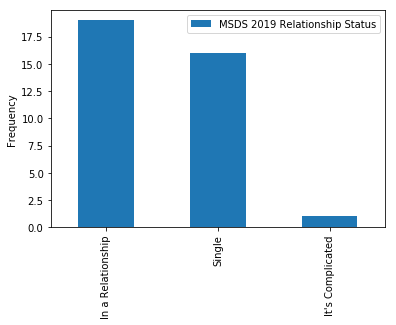

In [15]:
ax = df_state.plot(kind='bar')
ax.legend(['MSDS 2019 Relationship Status'])
ax.set_ylabel('Frequency')
print("Population per class: {}\n".format(df_state))
ax.set_xticklabels(['In a Relationship', 'Single', "It's Complicated"]);

In this dataset, there are __19__ individuals who are in a __relationship__, __16__ who are __single__, and __1__ who labeled his/her relationship status as __'it's complicated'__.

In [16]:
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

1.25 * Proportion Chance Criterion: 59.60648148148148%


The minimum accuracy a classifier must have for the classification is __59.61%__ for it to be considered significant.

### Model Simulation

In [17]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,500,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df['Target'], 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 25) # try n_neighbors from 1 to 25

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


### Plot of the First Simulation

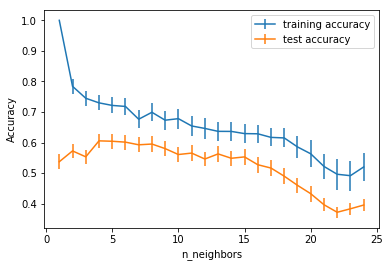

In [18]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [19]:
allfeatures = list(lahat_test.mean(axis=1))
print(max(allfeatures))
print(allfeatures.index(max(allfeatures))+1)

0.6054330883990187
4


Using all the features which consists of __137__ features, the optimal n_neighbors is __4__ with test accuracy of __60.54%__.

### Feature Selection

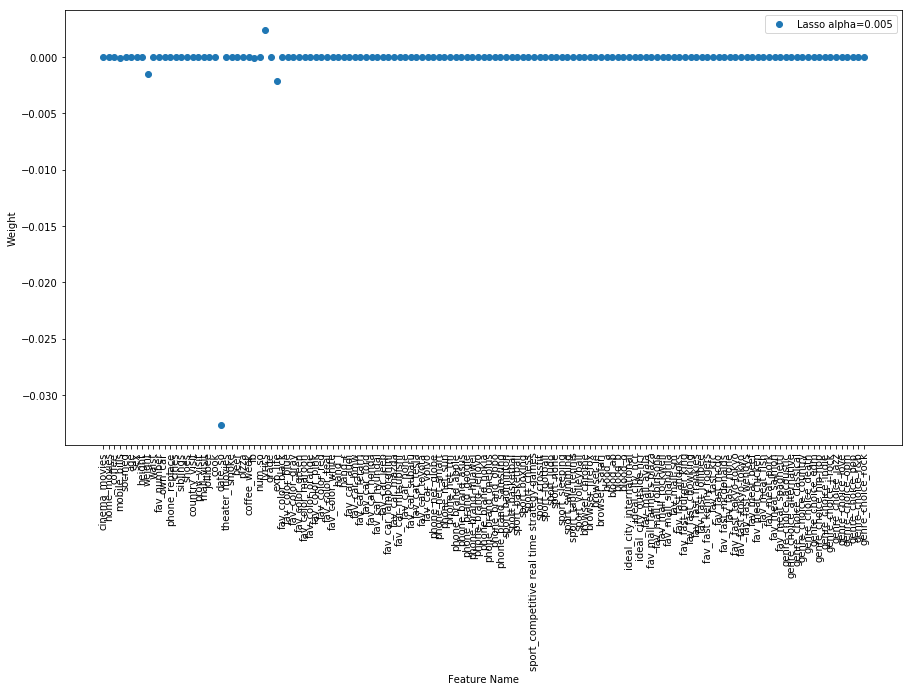

In [20]:
lasso10 = Lasso(alpha=0.5, max_iter=10000).fit(X_train, y_train)
fig = plt.figure(figsize=(15, 8))

plt.plot(lasso10.coef_, 'o', label="Lasso alpha=0.005")
plt.legend()
plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Weight');

In [21]:
selected_columns = ['date_so']
df_features1 = df[selected_columns]

For **df_features1**, we will be only using *date_so* as the predictor for the kNN Classification since the weight of the variable *date_so* on the Lasso Regression is relatively high compared to other variables. We chose this predictor since it will likely predict whether an individual is in a relationship based on their frequency to go on a date with his/her significant other.

In [22]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,500,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features1,df['Target'], 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 25) # try n_neighbors from 1 to 25

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


### Plot of the Second Simulation

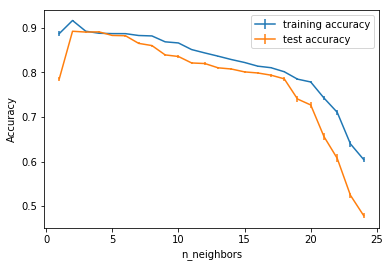

In [23]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [24]:
dateso_feature = list(lahat_test.mean(axis=1))
print(max(dateso_feature))
print(dateso_feature.index(max(dateso_feature))+1)

0.8922289022489449
2


Using only one feature namely *date_so*, the optimal n_neighbors is __2__ with test accuracy of __89.22%__.

In [25]:
drop_columns = ['date_so', 'num_so']
df_features2 = df_features.drop(drop_columns, axis=1)

What if we remove the variables date_so and num_so in our features? Since with these variables, you can logically predict whether an individual is in a relationship without running the model.

### Feature Selection

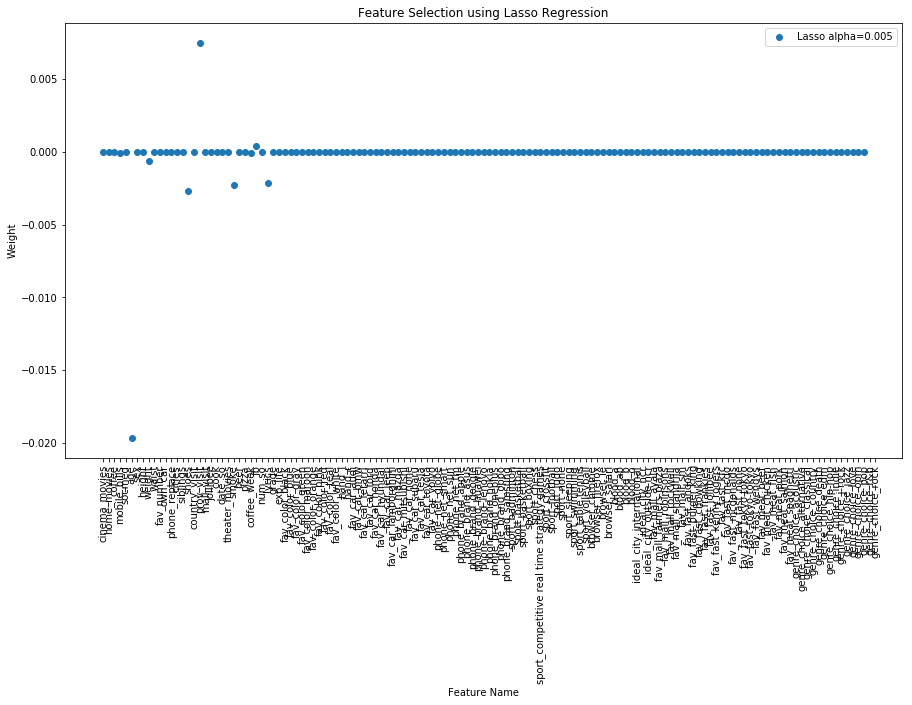

In [88]:
X_train, X_test, y_train, y_test = train_test_split(df_features2,df['Target'],
                                                    test_size=0.25)
lasso10 = Lasso(alpha=0.5, max_iter=10000).fit(X_train, y_train)
fig = plt.figure(figsize=(15, 8))

plt.plot(lasso10.coef_, 'o', label="Lasso alpha=0.005")
plt.legend()
plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
plt.title('Feature Selection using Lasso Regression')
plt.xlabel('Feature Name')
plt.ylabel('Weight');

Based on the plot above, there are 2 notable features with relatively high weights compared to others. Thus, we will be using the following variables **(age, prov_visit)** as the features to be used in the next simulation. In effect, we reduced the number of features used instead of using all the features.

In [83]:
selected_columns = ['age', 'prov_visit']
df_features3 = df[selected_columns]

In [84]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,500,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features3,df['Target'], 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 25) # try n_neighbors from 1 to 25

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


### Plot Results

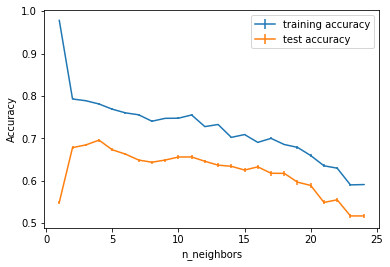

In [87]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [86]:
dummy5 = list(lahat_test.mean(axis=1))
print(max(dummy5))
print(dummy5.index(max(dummy5))+1)

0.6958361166777983
4


Using two features namely *age* and *prov_visit*, the optimal n_neighbors is __4__ with test accuracy of __69.58%__.

### Results

<p style="text-align: justify">After getting the mean under of test accuracy 500 random seeds, we observed that the optimal number of n_neighbors is __2__ when using k-NN classification . Which means that by using this model, with only *date_so* as the feature selected, the prediction will be __89.22%__ accurate with respect to forecasting the relationship status of an individual (in a relationship, single, or it's complicated). This is expected since by answering the survey question (How many times in a month do you go out with your significant other?), any individual will most likely answer it based on current and/or previous month which implies the relationship status he/she currently in.</p>
<p style="text-align: justify">On the other hand, if we remove the features **date_so** and **num_so**, the selected features are **age** and **prov_visit**. Using two features namely *age* and *prov_visit*, the optimal n_neighbors is __4__ with test accuracy of __69.58%__. We can say that as we grow old, we are more likely to focus on finding our significant other. Additionally, we are more likely to find our significant other if we have visited more provinces since we meet different people during our stay in every province.</p>

### Limitations

Since we are using k Nearest Neighbor Classification learning algorithm, we can only predict within the scope of our dataset. Thus, we cannot predict other relationship status that were not included in the dataset. Additionally, the dataset used were collected from MSDS Class 2019 only. In effect, the model's accuracy will not be consistent to other groups of individuals.

### References
1. Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017 <br>
2. A Complete Guide to K-Nearest-Neighbors with Applications in Python and R. (2018). Kevinzakka.github.io. <br>
3. Monterola, Chris. K-Nearest Neighbor Classification. Asian Institute of Management 2018